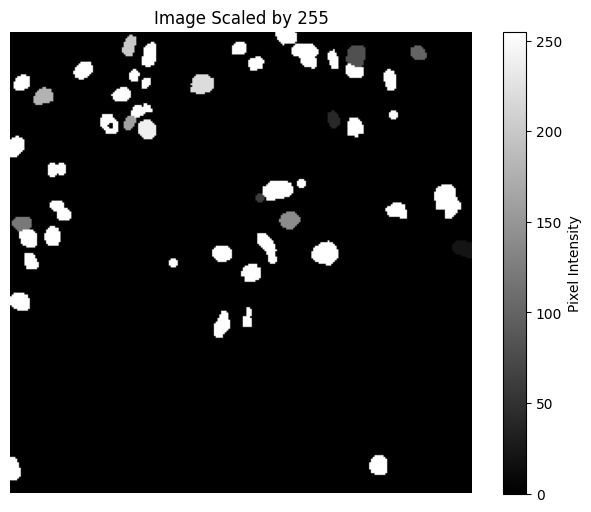

Visualization saved to scaled_image.png


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取 PNG 图像
image_path = "/data/hotaru/my_projects/cellseg1/data/dsb2018/test/masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe.tif"  # 替换为你的 PNG 文件路径
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # 保持原始格式读取

# 检查图像是否读取成功
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# 将像素值乘以 255
scaled_image = np.clip(image * 20, 0, 255).astype(np.uint8)

# 可视化并保存结果
plt.figure(figsize=(8, 6))
plt.imshow(scaled_image, cmap="gray")  # 假设是单通道灰度图
plt.colorbar(label="Pixel Intensity")
plt.title("Image Scaled by 255")
plt.axis("off")

# 保存可视化结果
save_path = "scaled_image.png"  # 替换为保存路径
plt.savefig(save_path, bbox_inches="tight")
plt.show()

print(f"Visualization saved to {save_path}")


In [2]:
import os
import scipy.io as sio
import numpy as np
import cv2

def process_labels(input_folder: str, output_folder: str):
    """
    读取文件夹中所有 .mat 文件的 inst_map 字段，将其保存为 PNG 文件。
    Args:
        input_folder (str): 包含 .mat 文件的输入文件夹路径。
        output_folder (str): 保存处理后 PNG 文件的输出文件夹路径。
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file_name in os.listdir(input_folder):
        if file_name.endswith(".mat"):
            file_path = os.path.join(input_folder, file_name)
            mat_data = sio.loadmat(file_path)
            
            if "inst_map" not in mat_data:
                print(f"Warning: 'inst_map' not found in {file_name}. Skipping.")
                continue
            
            inst_map = mat_data["inst_map"]
            
            # 检查 ID 范围是否超出 uint16 支持
            if inst_map.max() > 65535:
                print(f"Error: Instance IDs in {file_name} exceed uint16 limit.")
                continue
            
            # 转换为 uint16 格式
            inst_map_uint16 = inst_map.astype(np.uint16)
            
            output_file_name = os.path.splitext(file_name)[0] + ".png"
            output_file_path = os.path.join(output_folder, output_file_name)
            
            # 保存为 PNG 文件
            cv2.imwrite(output_file_path, inst_map_uint16)
            print(f"Processed and saved: {output_file_path}")

# 输入和输出路径
input_folder = "/data/hotaru/my_projects/PNS-one2/prompter/datasets/cpm17/train/Labels/256x256_164x164"
output_folder = "/data/hotaru/my_projects/cellseg1/streamlit_storage/cpmlabelpng"

process_labels(input_folder, output_folder)


Processed and saved: /data/hotaru/my_projects/cellseg1/streamlit_storage/cpmlabelpng/image_00_000.png
Processed and saved: /data/hotaru/my_projects/cellseg1/streamlit_storage/cpmlabelpng/image_00_001.png
Processed and saved: /data/hotaru/my_projects/cellseg1/streamlit_storage/cpmlabelpng/image_00_002.png
Processed and saved: /data/hotaru/my_projects/cellseg1/streamlit_storage/cpmlabelpng/image_00_003.png
Processed and saved: /data/hotaru/my_projects/cellseg1/streamlit_storage/cpmlabelpng/image_00_004.png
Processed and saved: /data/hotaru/my_projects/cellseg1/streamlit_storage/cpmlabelpng/image_00_005.png
Processed and saved: /data/hotaru/my_projects/cellseg1/streamlit_storage/cpmlabelpng/image_00_006.png
Processed and saved: /data/hotaru/my_projects/cellseg1/streamlit_storage/cpmlabelpng/image_00_007.png
Processed and saved: /data/hotaru/my_projects/cellseg1/streamlit_storage/cpmlabelpng/image_00_008.png
Processed and saved: /data/hotaru/my_projects/cellseg1/streamlit_storage/cpmlabelp